<a href="https://colab.research.google.com/github/AdakMahato/ML/blob/main/ML_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)
Download the dataset regarding USA House Price Prediction from the following link:
https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing
Load the dataset and Implement 5- fold cross validation for multiple linear regression
(using least square error fit).

Steps:

a) Divide the dataset into input features (all columns except price) and output variable
(price)

b) Scale the values of input features.

c) Divide input and output features into five folds.

d) Run five iterations, in each iteration consider one-fold as test set and remaining
four sets as training set. Find the beta (𝛽) matrix, predicted values, and R2_score
for each iteration using least square error fit.

e) Use the best value of (𝛽) matrix (for which R2_score is maximum), to train the
regressor for 70% of data and test the performance for remaining 30% data

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
dataFrame=pd.read_csv('USA_Housing.csv')
dataFrame.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
X,y=dataFrame.iloc[:,:-1],dataFrame.iloc[:,-1]

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [ ]:
'''scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()'''
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()
'''
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.750985,-0.216456,0.004600,0.029630,-0.974382
1,0.730233,0.024441,-0.199090,-0.711111,0.295278
2,-0.525578,-0.078688,1.104787,0.800000,0.050735
3,-0.381677,0.916661,-1.036259,-0.585185,-0.140381
4,-0.616810,-0.699930,0.612083,0.133333,-0.731592


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
beta_coefficients = []
fold = 1
for train_index, test_index in kf.split(X_scaled):
    print(f"\nFold {fold}")

    # Split the data into training and testing sets
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert to numpy arrays
    X_train_np = X_train.values
    X_test_np = X_test.values
    y_train_np = y_train.values.reshape(-1, 1)
    y_test_np = y_test.values.reshape(-1, 1)

    # Add intercept term to X_train and X_test
    ones_train = np.ones((X_train_np.shape[0], 1))
    ones_test = np.ones((X_test_np.shape[0], 1))

    X_train_b = np.hstack([ones_train, X_train_np])
    X_test_b = np.hstack([ones_test, X_test_np])

    # Calculate beta coefficients using Normal Equation
    beta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

    # Make predictions on the test set
    y_pred = X_test_b.dot(beta)

    # Calculate R2 score
    r2 = r2_score(y_test_np, y_pred)

    # Append results
    r2_scores.append(r2)
    beta_coefficients.append(beta)

    print(f"R2 Score: {r2}")

    fold += 1
best_index = np.argmax(r2_scores)
best_beta = beta_coefficients[best_index]

print(f"\nBest R2 Score obtained in fold {best_index + 1}: {r2_scores[best_index]}")
print("Best Beta Coefficients:")
print(best_beta.flatten())


Fold 1
R2 Score: 0.9221179988588144

Fold 2
R2 Score: 0.9123055828871819

Fold 3
R2 Score: 0.918243546010137

Fold 4
R2 Score: 0.9208918194355831

Fold 5
R2 Score: 0.9151260244346717

Best R2 Score obtained in fold 1: 0.9221179988588144
Best Beta Coefficients:
[1238953.88163092  308680.92755413  221222.34397066  164261.13033002
    1607.54936928  205395.96536734]


In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Convert to numpy arrays
X_train_full_np = X_train_full.values
X_test_full_np = X_test_full.values
y_train_full_np = y_train_full.values.reshape(-1, 1)
y_test_full_np = y_test_full.values.reshape(-1, 1)

# Add intercept term
ones_train_full = np.ones((X_train_full_np.shape[0], 1))
ones_test_full = np.ones((X_test_full_np.shape[0], 1))

X_train_full_b = np.hstack([ones_train_full, X_train_full_np])
X_test_full_b = np.hstack([ones_test_full, X_test_full_np])

# Make predictions on the test set using best beta
y_pred_full = X_test_full_b.dot(best_beta)

# Calculate R2 score
r2_full = r2_score(y_test_full_np, y_pred_full)

print(f"\nR2 Score on 30% test data using best beta: {r2_full}")


R2 Score on 30% test data using best beta: 0.914766860805924


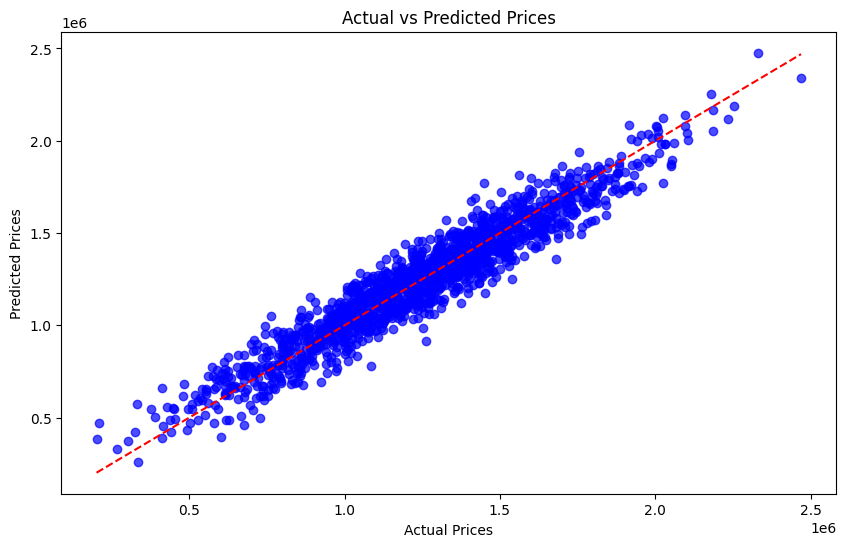

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_full, y_pred_full, alpha=0.7, color='b')
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


***
***


Q 2 Concept of Validation set for Multiple Linear Regression (Gradient Descent
Optimization)

Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the
dataset into training set (56%), validation set (14%), and test set (30%).
Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of
regression coefficients for each value of learning rate after 1000 iterations.
For each set of regression coefficients, compute R2_score for validation and test set and find
the best value of regression coefficients.

Input features shape: (5000, 5)
Output variable shape: (5000,)
Scaled features sample:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.028660            -0.296927                   0.021274   
1          1.000808             0.025902                  -0.255506   
2         -0.684629            -0.112303                   1.516243   
3         -0.491499             1.221572                  -1.393077   
4         -0.807073            -0.944834                   0.846742   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.317599  
1                     -0.722301         0.403999  
2                      0.930840         0.072410  
3                     -0.584540        -0.186734  
4                      0.201513        -0.988387  

Learning Rate: 0.001
R2 Score (Validation): 0.9156035463534404
R2 Score (Test): 0.9147211306268977

Learning Rate: 0.01
R2 Score (Validation): 0.9156035463534404
R2 Score (Test): 

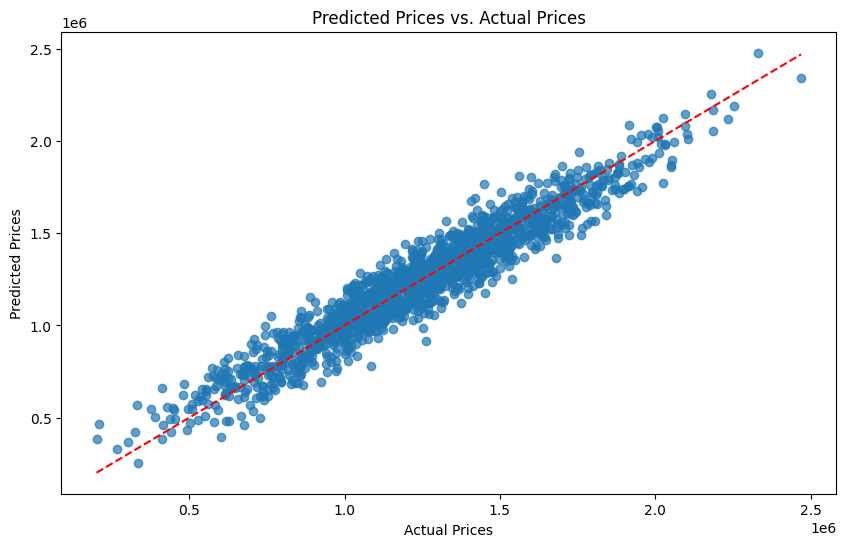

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

dataset = pd.read_csv('USA_Housing.csv')

X = dataset.drop('Price', axis=1)
y = dataset['Price']

print("Input features shape:", X.shape)
print("Output variable shape:", y.shape)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the input features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features sample:")
print(X_scaled.head())

# Split data into training, validation, and test sets (56%, 14%, 30%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2 / 0.64, random_state=42)

learning_rates = [0.001, 0.01, 0.1, 1]
best_r2_val = 0
best_beta_coefficients = None

# Store R2 scores for validation and test sets in lists
r2_val_scores = []
r2_test_scores = []

for learning_rate in learning_rates:
    model = LinearRegression()  # Using LinearRegression for gradient descent
    model.fit(X_train, y_train)

    # Make predictions on validation and test sets
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    # Calculate R2 scores for validation and test sets
    r2_val = r2_score(y_val, y_pred_val)
    r2_test = r2_score(y_test, y_pred_test)

    # Store R2 scores in lists
    r2_val_scores.append(r2_val)
    r2_test_scores.append(r2_test)

    print(f"\nLearning Rate: {learning_rate}")
    print(f"R2 Score (Validation): {r2_val}")
    print(f"R2 Score (Test): {r2_test}")

    if r2_val > best_r2_val:
        best_r2_val = r2_val
        best_beta_coefficients = model.coef_  # Extract coefficients

print(f"\nBest R2 Score (Validation): {best_r2_val}")
print("Best Beta Coefficients:")
print(best_beta_coefficients)

# Plot R2 scores now that they're calculated and stored
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Prices vs. Actual Prices')
plt.show()

***
***

Q 3 Pre-processing and Multiple Linear Regression
Download the dataset regarding Car Price Prediction from the following link:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

1. Load the dataset with following column names ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
and replace all ? values with NaN

2. Replace all NaN values with central tendency imputation. Drop the rows with NaN
values in price column

3. There are 10 columns in the dataset with non-numeric values. Convert these values to
numeric values using following scheme:
(i) For “num_doors” and “num_cylinders”: convert words (number names) to figures
for e.g., two to 2
(ii) For "body_style", "drive_wheels": use dummy encoding scheme
(iii) For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding
scheme
(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.
(v) For engine_type: replace values containing string ohc to 1 else all values to 0.

4. Divide the dataset into input features (all columns except price) and output variable
(price). Scale all input features.

5. Train a linear regressor on 70% of data (using inbuilt linear regression function of
Python) and test its performance on remaining 30% of data.

6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then
again train a linear regressor on 70% of reduced data (using inbuilt linear regression
function of Python). Does it lead to any performance improvement on test set?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [ ]:
# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Column names
columns = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
           "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
           "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
           "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

# Load the dataset with column names and replace '?' with NaN
df = pd.read_csv(url, names=columns, na_values='?')

# Display the first few rows of the dataset
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical data
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical data
        df[column].fillna(df[column].mean(), inplace=True)

# Drop rows where the 'price' column has NaN values
df = df.dropna(subset=['price'])

# Display the first few rows of the resulting DataFrame
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# Mapping dictionary for number names to digits
num_mapping = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'twelve': 12
}
# Convert "num_doors" and "num_cylinders" columns using the mapping
df['num_doors'] = df['num_doors'].replace(num_mapping)
df['num_cylinders'] = df['num_cylinders'].replace(num_mapping)

# Display the first few rows to verify the conversion
df[['num_doors', 'num_cylinders']].head()

,num_doors,num_cylinders
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


In [ ]:
# Perform dummy encoding for "body_style" and "drive_wheels"
df_dummies = pd.get_dummies(df[['body_style', 'drive_wheels']], drop_first=True)

# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns now that we have the dummy variables
df.drop(['body_style', 'drive_wheels'], axis=1, inplace=True)

# Display the first few rows to verify the transformation
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,13495.0,False,False,False,False,False,True
1,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,16500.0,False,False,False,False,False,True
2,1,122.0,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,5000.0,19,26,16500.0,False,True,False,False,False,True
3,2,164.0,audi,gas,std,4,front,99.8,176.6,66.2,...,5500.0,24,30,13950.0,False,False,True,False,True,False
4,2,164.0,audi,gas,std,4,front,99.4,176.6,66.4,...,5500.0,18,22,17450.0,False,False,True,False,False,False


In [ ]:
df.head(n=20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,13495.000000,False,False,False,False,False,True
1,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,5000.0,21,27,16500.000000,False,False,False,False,False,True
2,1,122.0,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,5000.0,19,26,16500.000000,False,True,False,False,False,True
3,2,164.0,audi,gas,std,4,front,99.8,176.6,66.2,...,5500.0,24,30,13950.000000,False,False,True,False,True,False
4,2,164.0,audi,gas,std,4,front,99.4,176.6,66.4,...,5500.0,18,22,17450.000000,False,False,True,False,False,False
5,2,122.0,audi,gas,std,2,front,99.8,177.3,66.3,...,5500.0,19,25,15250.000000,False,False,True,False,True,False
6,1,158.0,audi,gas,std,4,front,105.8,192.7,71.4,...,5500.0,19,25,17710.000000,False,False,True,False,True,False
7,1,122.0,audi,gas,std,4,front,105.8,192.7,71.4,...,5500.0,19,25,18920.000000,False,False,False,True,True,False
8,1,158.0,audi,gas,turbo,4,front,105.8,192.7,71.4,...,5500.0,17,20,23875.000000,False,False,True,False,True,False
9,0,122.0,audi,gas,turbo,2,front,99.5,178.2,67.9,...,5500.0,16,22,13207.129353,False,True,False,False,False,False


In [ ]:
df_dummies.head()

,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,True,False,False,False,True
3,False,False,True,False,True,False
4,False,False,True,False,False,False


In [ ]:
# Initialize LabelEncoders
label_encoders = {}
for column in ["make", "aspiration", "engine_location", "fuel_type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows to verify the encoding
df[['make', 'aspiration', 'engine_location', 'fuel_type']].head()

,make,aspiration,engine_location,fuel_type
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,1
4,1,0,0,1


In [ ]:
# Replace values in 'fuel_system' column
df['fuel_system'] = df['fuel_system'].apply(lambda x: 1 if 'pfi' in x else 0)

# Display the first few rows to verify the replacement
df[['fuel_system']].head()

,fuel_system
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Replace values in 'engine_type' column
df['engine_type'] = df['engine_type'].apply(lambda x: 1 if 'ohc' in x else 0)

# Display the first few rows to verify the replacement
print(df[['engine_type']].head())

   engine_type
0            1
1            1
2            1
3            1
4            1


In [ ]:
# Split the dataset into input features (X) and output variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Scale all input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled input features
# print(X_scaled_df.head())

# Display the input features (X_scaled_df) and output variable (y) separately
print("Input Features (X):")
print(X_scaled_df.head())

print("\nOutput Variable (y):")
print(y.head())

Input Features (X):
   symboling  normalized_losses      make  fuel_type  aspiration  num_doors  \
0   1.743470           0.000000 -1.948256   0.328798   -0.469295  -1.141653   
1   1.743470           0.000000 -1.948256   0.328798   -0.469295  -1.141653   
2   0.133509           0.000000 -1.948256   0.328798   -0.469295  -1.141653   
3   0.938490           1.328961 -1.788499   0.328798   -0.469295   0.875923   
4   0.938490           1.328961 -1.788499   0.328798   -0.469295   0.875923   

   engine_location  wheel_base    length     width  ...  horsepower  peak_rpm  \
0        -0.121867   -1.690772 -0.426521 -0.844782  ...    0.171065 -0.263484   
1        -0.121867   -1.690772 -0.426521 -0.844782  ...    0.171065 -0.263484   
2        -0.121867   -0.708596 -0.231513 -0.190566  ...    1.261807 -0.263484   
3        -0.121867    0.173698  0.207256  0.136542  ...   -0.057230  0.787346   
4        -0.121867    0.107110  0.207256  0.230001  ...    0.272529  0.787346   

   city_mpg  highw

In [ ]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model's performance
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Display first few predicted values and actual values for comparison
print("\nFirst few predicted values:")
print(y_pred[:5])

print("\nFirst few actual values:")
print(y_test.head())

Mean Squared Error (MSE): 13422229.59173256
R-squared (R2 Score): 0.8044422435762589

First few predicted values:
[24508.48664042 17221.81267621  9401.73511514 11929.49708847
 25985.42023935]

First few actual values:
15     30760.000000
9      13207.129353
100     9549.000000
132    11850.000000
68     28248.000000
Name: price, dtype: float64


In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the reduced data into 70% training and 30% testing
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the linear regression model on reduced data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Test the model's performance on reduced data
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the model's performance
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Display the results
print("Mean Squared Error (MSE) on PCA-reduced data:", mse_pca)
print("R-squared (R2 Score) on PCA-reduced data:", r2_pca)

# For comparison, retrain and evaluate the model on the original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

# Evaluate the model's performance on original data
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

# Display the results for original data
print("\nMean Squared Error (MSE) on original data:", mse_original)
print("R-squared (R2 Score) on original data:", r2_original)

Mean Squared Error (MSE) on PCA-reduced data: 17154268.253029235
R-squared (R2 Score) on PCA-reduced data: 0.7500675882701554

Mean Squared Error (MSE) on original data: 13422229.591732569
R-squared (R2 Score) on original data: 0.8044422435762588
